In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import matplotlib as mpl
from scipy import stats
import numpy_indexed as npi 
import glob, os
from mpl_toolkits.mplot3d import Axes3D
import emcee
from scipy import interpolate
import warnings
from scipy import stats
from scipy.interpolate import interp1d
warnings.filterwarnings("ignore")
plt.style.use('my')
def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth


/Applications/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:1069: UserWarning: Bad val "$TEMPLATE_BACKEND" on line #41
	"backend      : $TEMPLATE_BACKEND
"
	in file "/Applications/anaconda/lib/python2.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle"
	Key backend: Unrecognized backend string "$template_backend": valid strings are [u'pgf', u'cairo', u'MacOSX', u'CocoaAgg', u'gdk', u'ps', u'GTKAgg', u'nbAgg', u'GTK', u'Qt5Agg', u'template', u'emf', u'GTK3Cairo', u'GTK3Agg', u'WX', u'Qt4Agg', u'TkAgg', u'agg', u'svg', u'GTKCairo', u'WXAgg', u'WebAgg', u'pdf']
  (val, error_details, msg))


In [2]:
# high resolution
a=np.genfromtxt('../loc/blr.con_H7-14_phi17-24_col23_metal2_grid0.125',usecols=[0,6,1])
print a.shape

(26732772, 3)


In [150]:

mgii_ew=[]
ha_ew=[]
hb_ew=[]
mgii_f=[]
ha_f=[]
hb_f=[]
l3000=[]
F3000=[]
F1216=[]
U=[]
I=[]

#line base width 28,32,44 A
#flux=np.zeros(8228)
flux=[]
c=0
for i in np.arange(7,14.125,0.125):
    for j in np.arange(17,24.125,0.125):
        #print np.round(i,2)
        n=8228
        n0=0
        n0=n0+n*c
        n=n+n*c
        c=c+1
        U.append(np.round(j-i-10.5,2))
        I.append(i)
        #if (i >11) & (i < 11.2) & (j ==18.) :
            #plt.plot(a[n0:n,0],np.log10(a[n0:n,1]/a[n0:n,0]),'k',lw=1,alpha=0.5)

        f3000=(a[n0:n,2]/a[n0:n,0])[5526]
        F3000.append(f3000)
        f1216=(a[n0:n,2]/a[n0:n,0])[5798]
        F1216.append((a[n0:n,2]/a[n0:n,0])[5798])
       
        ha_f.append( ((a[n0:n,1]/a[n0:n,0])[5291]-(a[n0:n,1]/a[n0:n,0])[5290])*22 )
        hb_f.append( ((a[n0:n,1]/a[n0:n,0])[5381]-(a[n0:n,1]/a[n0:n,0])[5380])*16 )
        mgii_f.append( ((a[n0:n,1]/a[n0:n,0])[5547]-(a[n0:n,1]/a[n0:n,0])[5545])*14 )

        ha_ew.append( ((a[n0:n,1]/a[n0:n,0])[5291]-(a[n0:n,1]/a[n0:n,0])[5292])*22/f1216 )
        hb_ew.append( ((a[n0:n,1]/a[n0:n,0])[5381]-(a[n0:n,1]/a[n0:n,0])[5382])*16/f1216 )
        mgii_ew.append( ((a[n0:n,1]/a[n0:n,0])[5547]-(a[n0:n,1]/a[n0:n,0])[5548])*14/f1216 )
        
       
        
l3000=np.array(l3000)
F3000=np.array(F3000)
F1216=np.array(F1216)
ha_f=np.array(ha_f)
hb_f=np.array(hb_f)
mgii_f=np.array(mgii_f)
ha_ew=np.array(ha_ew)
hb_ew=np.array(hb_ew)
mgii_ew=np.array(mgii_ew)
U=np.array(U)
I=np.array(I)
flux=np.array(flux)






2.798633499190543


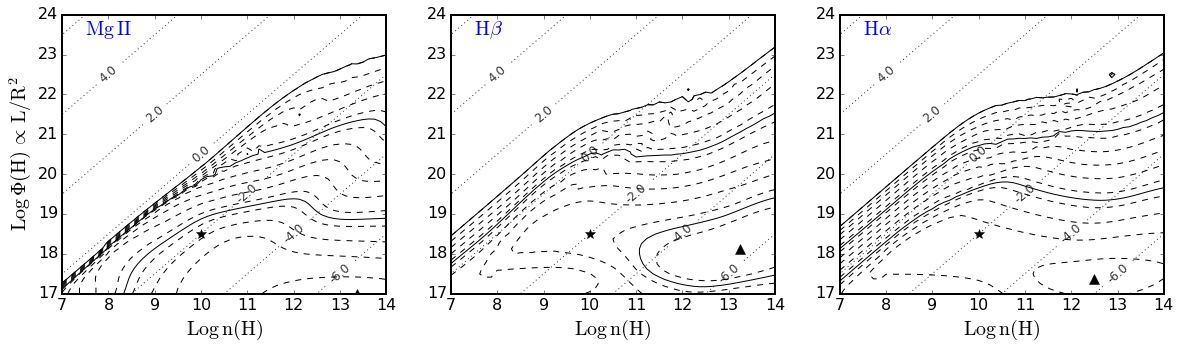

In [14]:
data=np.genfromtxt('../loc/blr.line_H7-14_phi17-24_col23_metal2_grid0.125_sphere',usecols=[2,3,4,5,-2])
mgii_f=data[:,2]#+data[:,3]
hb_f=data[:,0]
ha_f=data[:,1]
F1216=data[:,-1]/1216.
mgii_ew=mgii_f/F1216
hb_ew=hb_f/F1216
ha_ew=ha_f/F1216


X,Y = np.mgrid[7:14.125:0.125,17:24.125:0.125]
X1,Y1 = np.mgrid[7:14.5:0.5,17:24.5:0.5]
U=Y1-X1-10.5

plt.figure(figsize=(18,5))
plt.subplots_adjust(left=0.05,right=0.9)
plt.style.use('my')
plt.subplot(131)
indm=mgii_ew.argmax()
Z=np.log10((mgii_ew.reshape(57,57)))
print np.log10(mgii_ew).max()

cs=plt.contour(X1,Y1,U,colors='k',linestyles='dotted',linewidths=1,alpha=0.8)
plt.clabel(cs, fontsize=12,fmt='%1.1f')
plt.contour(X,Y,Z,levels=np.arange(0.1,4,0.2),linestyles='dashed',colors='k',linewidths=1)
plt.contour(X,Y,Z,levels=[0.1,1.,2.,3.],colors='k',linewidths=1)
plt.xlabel(r'$\rm Log\,n(H)$')
plt.ylabel(r'$\rm Log\,\Phi(H)\,\propto\,L/R^{2}$')
plt.text(7.5,23.5,r'$\rm Mg\,II$',color='blue',fontsize=20)
plt.plot(X.flatten()[indm],Y.flatten()[indm],'k^')
plt.plot(10,18.5,'k*')

plt.subplot(132)
indm=hb_ew.argmax()
Z=np.log10((hb_ew.reshape(57,57)))
cs=plt.contour(X1,Y1,U,colors='k',linestyles='dotted',linewidths=1,alpha=0.8)
plt.clabel(cs, inline=1, fontsize=12,fmt='%1.1f')
plt.contour(X,Y,Z,levels=np.arange(0.1,4,0.2),linestyles='dashed',colors='k',linewidths=1)
plt.contour(X,Y,Z,levels=[0.1,1.,2.,3],colors='k',linewidths=1)

plt.xlabel(r'$\rm Log\,n(H)$')
plt.text(7.5,23.5,r'$\rm H\beta$',color='blue',fontsize=20)
plt.plot(X.flatten()[indm],Y.flatten()[indm],'k^')
plt.plot(10,18.5,'k*')

plt.subplot(133)
indm=ha_ew.argmax()
Z=np.log10((ha_ew.reshape(57,57)))
cs=plt.contour(X1,Y1,U,colors='k',linestyles='dotted',linewidths=1,alpha=0.8)
plt.clabel(cs, inline=1, fontsize=12,fmt='%1.1f')
plt.contour(X,Y,Z,levels=np.arange(0.1,3,0.2),linestyles='dashed',colors='k',linewidths=1)
plt.contour(X,Y,Z,levels=[0.1,1.,2.],colors='k',linewidths=1)
#plt.ylabel(r'$\rm Log\,\Phi(H)$')
plt.xlabel(r'$\rm Log\,n(H)$')
plt.text(7.5,23.5,r'$\rm H\alpha$',color='blue',fontsize=20)
plt.plot(X.flatten()[indm],Y.flatten()[indm],'k^')
plt.plot(10,18.5,'k*')
#plt.savefig('../paper_fig/LOC.pdf')
#plt.savefig('/Users/legolason/Desktop/CL_mgII/LOC.pdf')

(5329, 7)
EW 462.2974151319774 129.03517733069626
EW 335.8022199612716 48.84066138141088


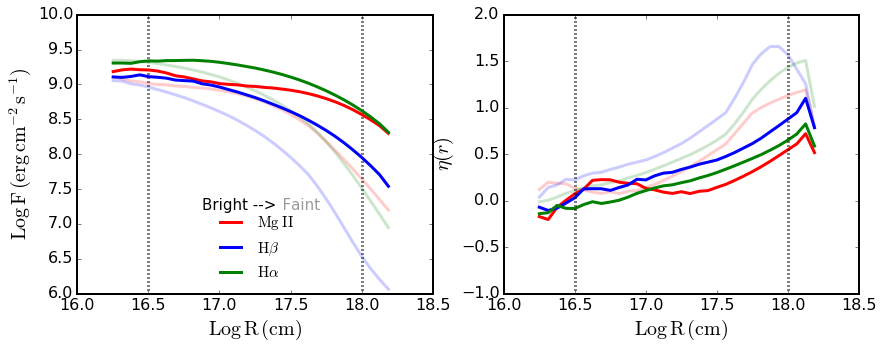

In [174]:
data=np.genfromtxt('../loc/blr.line_H6-15_phi16-25_col23_metal2_grid0.125_sphere',usecols=[2,3,4,5,-3,-2,-1])
print data.shape

mgii_f=(data[:,2]+data[:,3])
hb_f=data[:,0]
ha_f=data[:,1]
inci_f=data[:,5]/1216. # incident flux at 1215
con_f=data[:,6]/3646. #continue flux at 3646
lya_f=data[:,4] # lya flux at 1216

#1.35 = f1350/f3000


mgii_R=[]
hb_R=[]
ha_R=[]
lya_R=[]
inci_R=[]
con_R=[]
nn=73
X,Y=np.mgrid[6:15.125:0.125,16:25.125:0.125]

for i in range(nn):
    ind = np.where(  (X.flatten()[i::nn]<=12) & (X.flatten()[i::nn]>=8) &
                     ((Y.flatten()[i::nn]-X.flatten()[i::nn]) <= 11.25) &
                     ((Y.flatten()[i::nn]-X.flatten()[i::nn]) > 6),True,False)
    mgii_R.append(mgii_f[i::nn][ind].sum() )
    hb_R.append(hb_f[i::nn][ind].sum() )
    ha_R.append(ha_f[i::nn][ind].sum() )
    con_R.append(con_f[i::nn][ind].sum() )
    inci_R.append(inci_f[i::nn][ind].sum() )
    lya_R.append(lya_f[i::nn][ind].sum() )
mgii_R=np.array(mgii_R)
hb_R=np.array(hb_R)
ha_R=np.array(ha_R)
con_R=np.array(con_R)
lya_R=np.array(lya_R )
inci_R=np.array(inci_R)

###parameters 
Rin=16.5
Rout=18        
Cf=0.5
gam=3-1.1 #gamma 1.1


plt.figure(figsize=(14,5))
for QH in [3e54,3e55]:
    ax1=plt.subplot(121)
    if QH == 3e55:
        al=1
        plt.xlim(16,18.5)
        plt.ylabel(r'$\rm Log\, F\, (erg\,cm^{-2}\,s^{-1})$')
        plt.xlabel(r'$\rm Log\,R\,(cm)$')
        plt.plot([],[],'r',label=r'$\rm Mg\;II$')
        plt.plot([],[],'b',label=r'$\rm H\beta$')
        plt.plot([],[],'g',label=r'$\rm H\alpha$')
        plt.text(0.35,0.3,r'Bright -->',fontsize=15,transform=ax1.transAxes)
        plt.text(0.55,0.3,r'  Faint',fontsize=15,transform=ax1.transAxes,alpha=0.4)
        plt.legend(loc=8,frameon=False,fontsize=15)
        plt.ylim(6,10)
        plt.plot([Rout,Rout],[0,12],'k:')
        plt.plot([Rin,Rin],[0,12],'k:')
        
    else:
        al=0.2
    
    R=np.sqrt(QH/12.56/10**np.arange(16,25.125,0.125))
    indr=np.where( (np.log10(R) > 16.2) & (np.log10(R) < 18.2),True,False)
    plt.plot(np.log10(R[indr]),np.log10(mgii_R[indr]),'r',alpha=al)
    plt.plot(np.log10(R[indr]),np.log10(hb_R[indr]),'b',alpha=al)
    plt.plot(np.log10(R[indr]),np.log10(ha_R[indr]),'g',alpha=al)
    #plt.plot(np.log10(R),np.log10(con_R),'c',label=r'$\rm Conti$')
    #plt.plot(np.log10(R),np.log10(inci_R),'k',label=r'$\rm Inci$')
    #plt.plot(np.log10(R),np.log10(lya_R),'k',label=r'$\rm Lya$')


    indR=np.where( (R > 10**Rin) & (R< 10**Rout),True,False )
    Lmgii=np.log10(np.sum(10**(np.log10(R[indR])*gam+np.log10(mgii_R[indR]))))
    Llya=np.log10(np.sum(10**(np.log10(R[indR])*gam+np.log10(lya_R[indR]))))
    Linci=np.log10(np.sum(10**(np.log10(R[indR])*gam+np.log10(inci_R[indR]))))

    
    print 'EW' , 10**Llya*Cf/10**Linci, 10**Lmgii*Cf/(10**Linci/1.35)
    x1=np.linspace(16,18.5)


    plt.subplot(122)
    eta_mgii=[]
    eta_hb=[]
    eta_ha=[]
    for i in range(72):
        eta_mgii.append(-0.5*(np.log10(mgii_R[i])-np.log10(mgii_R[i+1]))/(np.log10(R[i])-np.log10(R[i+1])))
        eta_hb.append(-0.5*(np.log10(hb_R[i])-np.log10(hb_R[i+1]))/(np.log10(R[i])-np.log10(R[i+1])))
        eta_ha.append(-0.5*(np.log10(ha_R[i])-np.log10(ha_R[i+1]))/(np.log10(R[i])-np.log10(R[i+1])))
    indr=np.where((np.log10(R[:-1]) > 16.2) & (np.log10(R[:-1]) < 18.2),True,False)
    eta_mgii=np.array(eta_mgii)
    eta_hb=np.array(eta_hb)
    eta_ha=np.array(eta_ha)
    plt.plot(np.log10(R[:-1][indr]),smooth(eta_mgii[indr],3),'r',alpha=al)
    plt.plot(np.log10(R[:-1][indr]),smooth(eta_hb[indr],3),'b',alpha=al)
    plt.plot(np.log10(R[:-1][indr]),smooth(eta_ha[indr],3),'g',alpha=al)

plt.ylim(-1,2)
plt.xlim(16,18.5)
plt.xlabel(r'$\rm Log\,R\,(cm)$')
plt.ylabel(r'$\eta (r)$')

plt.plot([Rout,Rout],[-1,2],'k:')
plt.plot([Rin,Rin],[-1,2],'k:')


plt.savefig('/Users/legolason/Desktop/emissivity.pdf')

In [5]:
c=0
x=[]
y=[]
for i in np.arange(7,14.125,0.125):
    for j in np.arange(17,24.125,0.125):
        c= c+1
        x.append(i)
        y.append(j)
        
x=np.array(x)
y=np.array(y)

print y.reshape(57,57)

nn=57
for k in range(nn):
    #print x[k::nn][9:41]
    ind=np.where(x[k::nn][9:41]+11.25>= y[k::nn][9:41][0] )
    #print x[k::nn][9:41][ind]
    #print y[k::nn][9:41][ind]
    break

[[17.    17.125 17.25  ... 23.75  23.875 24.   ]
 [17.    17.125 17.25  ... 23.75  23.875 24.   ]
 [17.    17.125 17.25  ... 23.75  23.875 24.   ]
 ...
 [17.    17.125 17.25  ... 23.75  23.875 24.   ]
 [17.    17.125 17.25  ... 23.75  23.875 24.   ]
 [17.    17.125 17.25  ... 23.75  23.875 24.   ]]


In [201]:
print np.log10(np.sqrt(10**55.5/10**17.9/12.56))

18.250505180299413


In [286]:
print 1.e16/(3e10*86400)

3.85802469136


2.592e+15
17.559763032876795


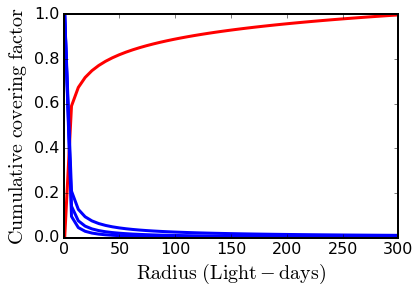

In [94]:
ltday=3e10*86400
print ltday
print np.log10(ltday*140)
#print 1.35e17/ltday

x=np.linspace(1,300)


for gamma in [-1]:
    y0=0
    yy=[]
    for i in range(len(x)):
        y= x[i]**gamma/np.sum(x**gamma)
        #plt.plot(x[i],y0,'r.')
        yy.append(y0)
        y0=y0+y
    plt.plot(x,yy,'r')


for gamma in [-0.8,-1,-1.2]:
    #for i in range(len(x)):
    y= x**gamma#/np.sum(x**gamma)
    plt.plot(x,y,'b')
    
plt.xlabel(r'$\rm Radius\ (Light-days)$')
plt.ylabel(r'$\rm Cumulative\ covering\ factor$')

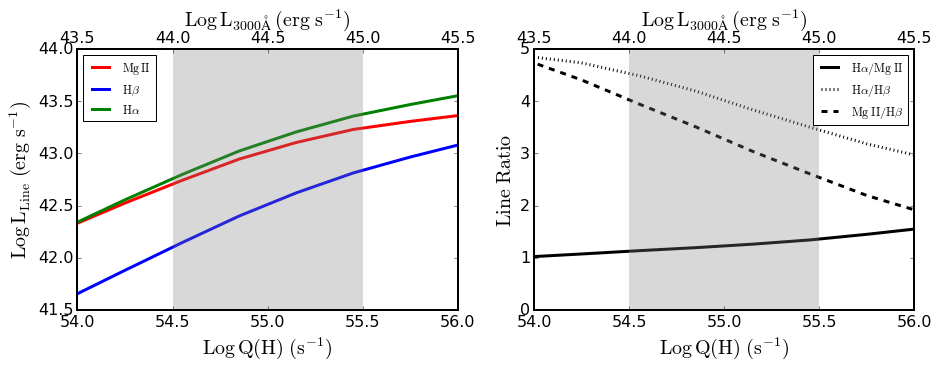

In [176]:

Lline_mgii=[]
Lline_ha=[]
Lline_hb=[]
QH=np.logspace(52.,58,100)

for i in QH:
    qh=i
    R=np.sqrt(qh/12.56/10**np.arange(16,25.125,0.125))
    ind=np.where( (R < 10**Rout) ,True,False )
    Lline_mgii.append( (R[ind]**gam*mgii_R[ind]).sum() )
    Lline_hb.append( (R[ind]**gam*hb_R[ind]).sum() )
    Lline_ha.append( (R[ind]**gam*ha_R[ind]).sum() )   
Lline_ha=np.array(Lline_ha)
Lline_mgii=np.array(Lline_mgii)
Lline_hb=np.array(Lline_hb)

sf=10.5 #0.7 is log10(5.15) 

for line in zip([Lline_mgii,Lline_hb,Lline_ha],['r','b','g']):
    means, bin_edges, binnumber = stats.binned_statistic(np.log10(QH)-sf,line[0], statistic='mean',bins=20)
    #plt.plot((bin_edges[:-1]+ bin_edges[1:])/2.,np.log10(means),line[1])
    w=(bin_edges[:-1]+ bin_edges[1:])/2.
    if line[1] == 'r':
        rf=np.asarray(means)
    if line[1] == 'b':
        bf=np.asarray(means)
    if line[1] == 'g':
        gf=np.asarray(means)



plt.figure(figsize=(15,5))
plt.subplots_adjust(top=0.85)
ax1=plt.subplot(121)
plt.plot(w+sf,np.log10(rf*Cf),'r',label=r'$\rm Mg\,II$')
plt.plot(w+sf,np.log10(bf*Cf),'b',label=r'$\rm H\beta$')
plt.plot(w+sf,np.log10(gf*Cf),'g',label=r'$\rm H\alpha$')
plt.ylabel(r'$\rm  Log\,L_{Line}\ (erg\,\,s^{-1})$')
plt.text(0.05,0.9,'LOC',fontsize=20,transform=ax1.transAxes)
plt.legend(loc='best')
#plt.text(44.+sf,600,'Obs.',fontsize=20)
plt.axvline(x=44.5+sf, ymin=0,ymax=1000, linewidth=190, color='grey',alpha=0.3)
#plt.xlabel(r"$\rm L_{3000\AA}\, (erg\,\, s^{-1})$")
#plt.ylim(1.8,3.0)
plt.xlim(42+sf+1.5,47+sf-1.5)
plt.ylim(41.5,44)
plt.xlabel(r'$\rm Log\, Q(H)\,\, (s^{-1})$')

ax2 = ax1.twiny()
ax2.set_xlim(42+1.5,47-1.5)
ax2.set_xlabel(r"$\rm Log\, L_{3000\AA}\, (erg\,\, s^{-1})$")


ax1=plt.subplot(122)
plt.plot(w+sf,gf/rf,'k',label=r'$\rm H\alpha/Mg\;II$')
plt.plot(w+sf,gf/bf,'k:',label=r'$\rm H\alpha/H\beta$')
plt.plot(w+sf,rf/bf,'k--',label=r'$\rm Mg\;II/H\beta$')

plt.axvline(x=44.5+sf, ymin=0,ymax=1000, linewidth=190, color='grey',alpha=0.3)

plt.xlabel(r'$\rm Log\, Q(H)\,\, (s^{-1})$')
plt.ylabel(r'$\rm Line\,\, Ratio$')
plt.xlim(42+sf+1.5,47+sf-1.5)
plt.legend(loc='best')
plt.ylim(0,5)
ax2 = ax1.twiny()
ax2.set_xlim(42+1.5,47-1.5)
ax2.set_xlabel(r"$\rm Log\,L_{3000\AA}\, (erg\,\, s^{-1})$")
#plt.savefig('/Users/legolason/Desktop/LOC/model_LOC.pdf')



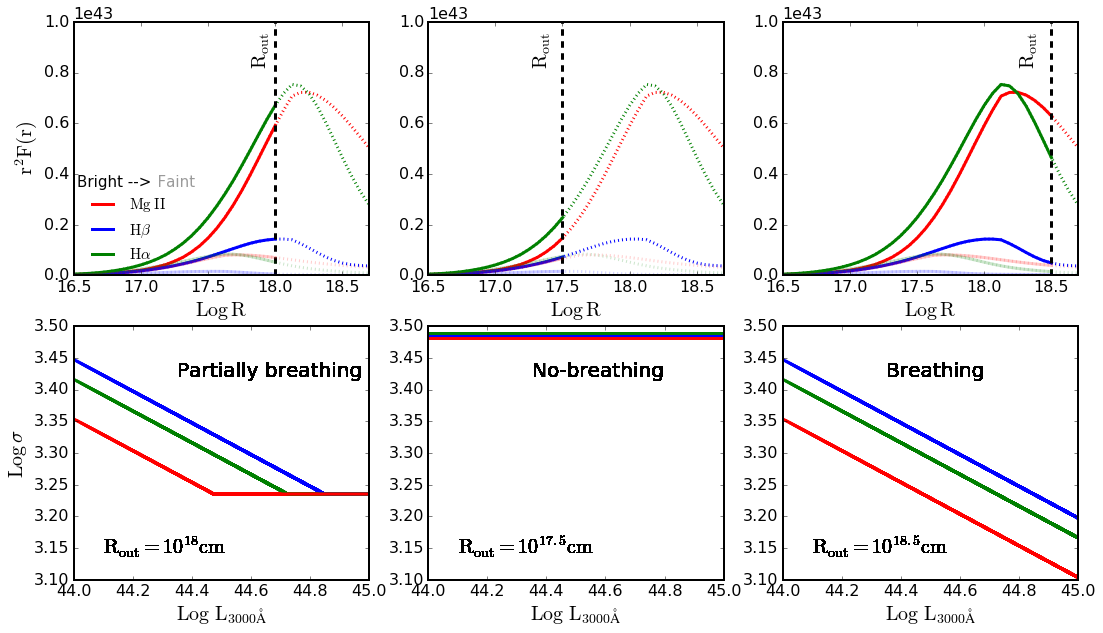

In [177]:
def Rtosig(R):
    R=R/100
    Msun=1.98e30 # kg
    Mbh=1.e9*Msun
    G=6.67e-11 # m^3 kg^-2 s^-2
    f=4.47
    V= np.sqrt(Mbh*G/f/R)/1000.
    return V # return sigma

plt.figure(figsize=(18,10))
for kk in zip(range(3),[18.0,17.5,18.5]):

    ax=plt.subplot(2,3,kk[0]+1)
    for ii in zip([3.e55,3.e54],[1,0.2]):
        QH=ii[0]
        R=np.sqrt(QH/12.56/10**np.arange(16,25.125,0.125))
        ind=np.where(R < 10**(kk[1]+0.01),True,False)
        plt.plot(np.log10(R),(R**gam*mgii_R),'r:',alpha=ii[1])
        plt.plot(np.log10(R),(R**gam*hb_R),'b:',alpha=ii[1])
        plt.plot(np.log10(R),(R**gam*ha_R),'g:',alpha=ii[1])
        plt.plot([kk[1],kk[1]],[(R**gam*ha_R).min(),1e43],'k--')
        plt.plot(np.log10(R[ind]),(R[ind]**gam*mgii_R[ind]),'r',alpha=ii[1])
        plt.plot(np.log10(R[ind]),(R[ind]**gam*hb_R[ind]),'b',alpha=ii[1])
        plt.plot(np.log10(R[ind]),(R[ind]**gam*ha_R[ind]),'g',alpha=ii[1])
    plt.xlim(16.5,18.7)
    plt.xlabel(r'$\rm Log\,R $')
    
    if kk[0]==0:
        
        plt.text(0.6,0.9,r'$\rm R_{out} $',rotation=90,fontsize=20,transform=ax.transAxes)
        plt.ylabel(r'$\rm \,r^2F(r)$')
        plt.plot([],[],'r',label=r'$\rm Mg\;II$')
        plt.plot([],[],'b',label=r'$\rm H\beta$')
        plt.plot([],[],'g',label=r'$\rm H\alpha$')
        plt.legend(loc=3,frameon=False,fontsize=15)
        plt.text(0.01,0.35,r'Bright -->',fontsize=15,transform=ax.transAxes)
        plt.text(0.25,0.35,r'  Faint',fontsize=15,transform=ax.transAxes,alpha=0.4)
        
    if kk[0]==1:
        plt.text(0.35,0.9,r'$\rm R_{out}$',rotation=90,fontsize=20,transform=ax.transAxes)
    if kk[0]==2:
        plt.text(0.8,0.9,r'$\rm R_{out}$',rotation=90,fontsize=20,transform=ax.transAxes)


    ax=plt.subplot(2,3,kk[0]+4)
    Lline_mgii=[]
    Lline_ha=[]
    Lline_hb=[]
    mgii_Peak=[]
    qq=[]
    y1=[]
    y2=[]
    y3=[]
    for Rout in [kk[1]]:
        for i in range(73):
            QH=np.logspace(55.5,54.5,73)[i]
            R=np.sqrt(QH/12.56/10**np.arange(16,25.125,0.125))
            mx=10**Rout
            hb_peak = R[(R**gam*hb_R).argmax()].clip(max =mx)
            ha_peak = R[(R**gam*ha_R).argmax()].clip(max =mx)
            mgii_peak = R[(R**gam*mgii_R).argmax()].clip(max =mx)

            qq.append(np.log10(QH)-10.5)
            y1.append(np.log10(Rtosig(hb_peak)))
            y2.append(np.log10(Rtosig(ha_peak)))
            y3.append(np.log10(Rtosig(mgii_peak)))
            if kk[1] == 18:
                plt.plot(qq,y1,'b',qq,y2,'g',qq,y3,'r',alpha=1)
                plt.text(0.35,0.8,r'Partially breathing',fontsize=20,transform=ax.transAxes)
                plt.text(0.1,0.1,r'$\rm R_{out}=10^{18}cm$',fontsize=20,transform=ax.transAxes)
            if kk[1] == 18.5:    
                plt.plot(qq,y1,'b',qq,y2,'g',qq,y3,'r',alpha=1)
                plt.text(0.35,0.8,r'Breathing',fontsize=20,transform=ax.transAxes)
                plt.text(0.1,0.1,r'$\rm R_{out}=10^{18.5}cm$',fontsize=20,transform=ax.transAxes)
            if kk[1] == 17.5:  
                plt.plot(qq,y1,'b',np.array(y2)+0.004,'g',qq,np.array(y3)-0.004,'r',alpha=1)
                plt.text(0.35,0.8,'No-breathing',fontsize=20,transform=ax.transAxes)
                plt.text(0.1,0.1,r'$\rm R_{out}=10^{17.5}cm$',fontsize=20,transform=ax.transAxes)
            
    plt.xlabel(r"$\rm Log\ L_{3000\AA} $")
    if kk[0]==0:
        plt.ylabel(r"$\rm Log\,\sigma $")
    plt.ylim(3.1,3.5)
    plt.xlim(44,45)
#plt.savefig('/Users/legolason/Desktop/emissivity.pdf')

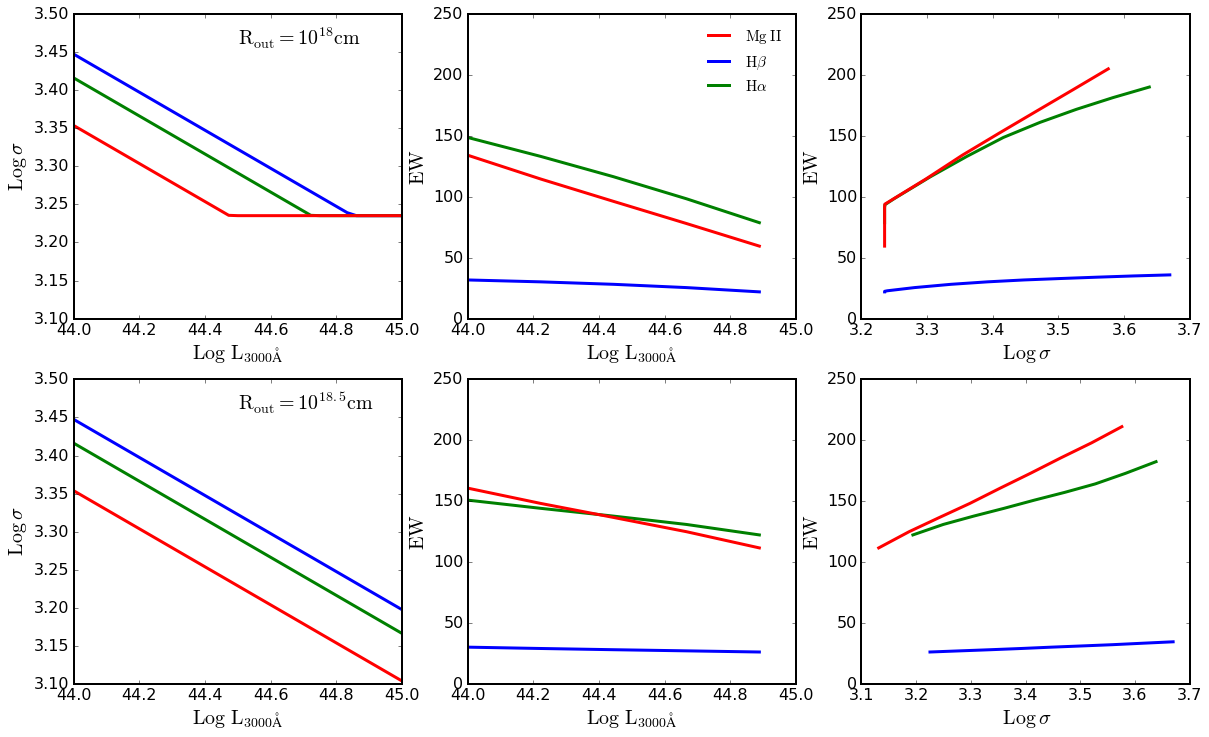

In [179]:
plt.figure(figsize=(20,12))

for jj in zip(range(2),[10**18.,10**18.5]):
    #print jj[0]*3+1
    ax=plt.subplot(2,3,jj[0]*3+1)
    Lline_mgii=[]
    Lline_ha=[]
    Lline_hb=[]
    mgii_Peak=[]
    Linci=[]
    Lcon=[]
    w_mgii=[]
    w_hb=[]
    w_ha=[]
    al=1

    for i in range(73):
        QH=np.logspace(53.5,55.5,73)[i]
        R=np.sqrt(QH/12.56/10**np.arange(16,25.125,0.125))
        mx=jj[1]
        ind=np.where( (R > 10**16.5) & (R < jj[1]),True,False)
        hb_peak = R[(R**gam*hb_R).argmax()].clip(max =mx)
        ha_peak = R[(R**gam*ha_R).argmax()].clip(max =mx)
        mgii_peak = R[(R**gam*mgii_R).argmax()].clip(max =mx)
        Lline_mgii.append( (R[ind]**gam*mgii_R[ind]).sum() )
        Lline_hb.append( (R[ind]**gam*hb_R[ind]).sum() )
        Lline_ha.append( (R[ind]**gam*ha_R[ind]).sum() )  
        Linci.append( (R[ind]**gam*inci_R[ind]).sum() )

        Lcon.append(np.log10(QH)-10.5)
        w_hb.append(np.log10(Rtosig(hb_peak)))
        w_ha.append(np.log10(Rtosig(ha_peak)))
        w_mgii.append(np.log10(Rtosig(mgii_peak)))
    plt.plot(Lcon,w_hb,'b',Lcon,w_ha,'g',Lcon,w_mgii,'r',alpha=al)
    plt.xlabel(r"$\rm Log\ L_{3000\AA}$")
    plt.ylabel(r"$\rm \, Log\,\sigma$")
    plt.ylim(3.1,3.5)
    plt.xlim(44,45)
    if jj[0] == 0:
        plt.text(0.5,0.9,r'$\rm R_{out}=10^{18}cm$',fontsize=20,transform=ax.transAxes)
    if jj[0] == 1:
        plt.text(0.5,0.9,r'$\rm R_{out}=10^{18.5}cm$',fontsize=20,transform=ax.transAxes)
        
    Lline_mgii=np.array(Lline_mgii)
    Lline_hb=np.array(Lline_hb)
    Lline_ha=np.array(Lline_ha)
    Lcon=np.array(Lcon)
    Linci=np.array(Linci)
    
    
    ew_mgii = Lline_mgii*Cf/(Linci/1.35)
    ew_hb = Lline_hb*Cf/(Linci/1.35)
    ew_ha = Lline_ha*Cf/(Linci/1.35)
    

    ax=plt.subplot(2,3,jj[0]*3+2)
    for i in zip(['b','g','r'],[ew_hb,ew_ha,ew_mgii]):
        means, bin_edges, binnumber = stats.binned_statistic(Lcon,i[1], statistic='mean',bins=9)
        xx=(bin_edges[:-1]+ bin_edges[1:])/2.
        yy=means
        #plt.plot((bin_edges[:-1]+ bin_edges[1:])/2.,means,color=i[0])
        f2 = interp1d(xx, yy, bounds_error=False)
        #print np.polyfit(xx,np.log10(yy),1)[0]
        ynew=f2(Lcon)
        #plt.plot(Lcon,ynew,color=i[0])
        if i[0]=='b':
            ew_hb=ynew
        if i[0]=='g':
            ew_ha=ynew
        if i[0]=='r':
            ew_mgii=ynew
    plt.plot(Lcon,ew_hb)
    plt.plot(Lcon,ew_ha)
    plt.plot(Lcon,ew_mgii)
    
    plt.xlabel(r"$\rm Log\ L_{3000\AA}$")
    plt.ylabel(r"$\rm EW$")
    plt.xlim(44,45)


    plt.plot([],[],'r',label=r'$\rm Mg\;II$')
    plt.plot([],[],'b',label=r'$\rm H\beta$')
    plt.plot([],[],'g',label=r'$\rm H\alpha$')
    if jj[0] ==0:
        plt.legend(loc='best',fontsize=15,frameon=False)


    ax=plt.subplot(2,3,jj[0]*3+3)
    plt.plot(w_hb,ew_hb,'b')
    plt.plot(w_ha,ew_ha,'g')
    plt.plot(w_mgii,ew_mgii,'r')
    #if jj[0]==0:
    #    plt.xlim(2.5,3)
    #else:
    #    plt.xlim(2.4,2.9)
    plt.ylabel(r"$\rm EW$")
    plt.xlabel(r"$\rm \, Log\,\sigma$")
    
    #assume a object z = 0.8
    #ff=12.56*(5100*3e24)**2*1.e-17
    #np.savetxt('./new_var_sig.txt',np.c_[Lcon[::3],Lline_mgii[::3]/ff,Lline_hb[::3]/ff,Lline_ha[::3]/ff,
    #                                     10**np.array(w_mgii[::3]),10**np.array(w_hb[::3]),10**np.array(w_ha[::3])],
    #           comments='Lcon,Lline_mgii,Lline_hb,Lline_ha,sig_mgii,sig_hb,sig_ha')

#plt.savefig('/Users/legolason/Desktop/LOC/FWHM-EW.pdf')

(25, 7)


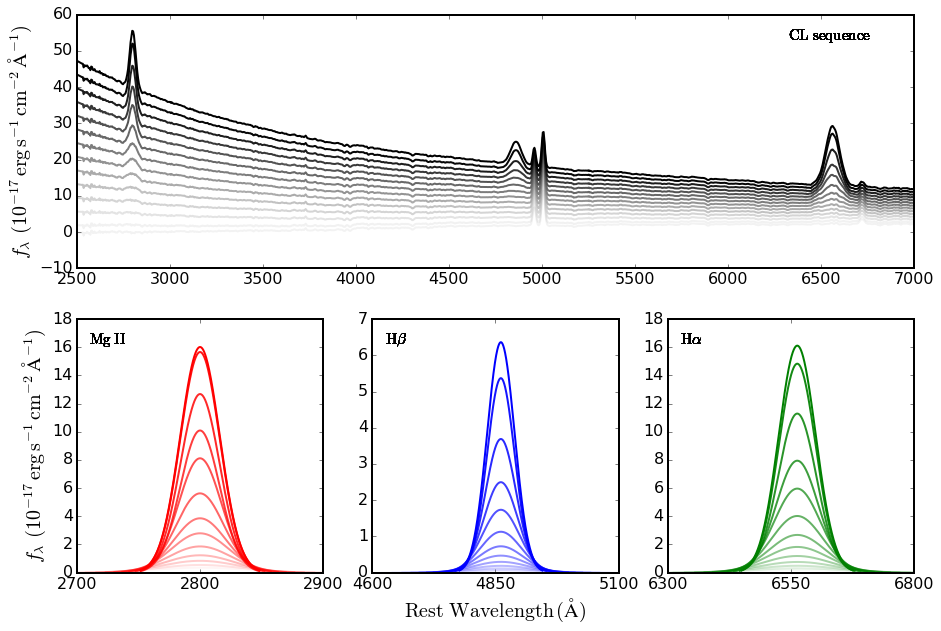

In [180]:
data=np.genfromtxt('./new_var_sig.txt') #xx,yLmgii,yLhb,yLha,ywmgii,ywhb,ywha
print data.shape

xp=np.linspace(2500,7000,1000)

def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))
def line(mu,sig,var):
    mu=mu
    sig=sig/3e5*mu  # c in km/s 
    left = mu-3*sig
    right = mu+3*sig
    disp = 0.1
    npix = int((right-left)/disp)
    x = np.linspace(left, right, npix+1)
    y=gaussian(x,mu,sig)
    area = (y*disp).sum()
    f=var/area
    y=f*gaussian(x,mu,sig)
    return x,y

plt.figure(figsize=(15,10))

#----OIII---------
mu=4959
sig=8
npix= int((mu+5*sig)-(mu-5*sig))/0.1
w=np.linspace(mu-5*sig, mu+5*sig, npix+1)
f=interp1d(w,5*gaussian(w,mu,sig),bounds_error=False,fill_value=0)
y_o1=f(xp)

mu=5007
w=np.linspace(mu-5*sig, mu+5*sig, npix+1)
f=interp1d(w,10*gaussian(w,mu,sig),bounds_error=False,fill_value=0)
y_o2=f(xp)

mu=6563
w=np.linspace(mu-5*sig, mu+5*sig, npix+1)
f=interp1d(w,2*gaussian(w,mu,sig),bounds_error=False,fill_value=0)
y_ha=f(xp)

mu=6584
w=np.linspace(mu-5*sig, mu+5*sig, npix+1)
f=interp1d(w,2*gaussian(w,mu,sig),bounds_error=False,fill_value=0)
y_n1=f(xp)
mu=6548
w=np.linspace(mu-5*sig, mu+5*sig, npix+1)
f=interp1d(w,0.7*gaussian(w,mu,sig),bounds_error=False,fill_value=0)
y_n2=f(xp)
mu=6716
w=np.linspace(mu-5*sig, mu+5*sig, npix+1)
f=interp1d(w,1*gaussian(w,mu,sig),bounds_error=False,fill_value=0)
y_s1=f(xp)
mu=6730
w=np.linspace(mu-5*sig, mu+5*sig, npix+1)
f=interp1d(w,1*gaussian(w,mu,sig),bounds_error=False,fill_value=0)
y_s2=f(xp)

YN=y_o1+y_o2+y_s1+y_s2#+y_ha+y_n1+y_n2



#----host----
host=np.genfromtxt('../../faint_mean.txt')
#plt.plot(data[:,0][120:-50],10*data[:,1][120:-50],'grey',lw=1)
f=interp1d(host[:,0][120:-50],host[:,1][120:-50],bounds_error=False,fill_value=0)
yhost=f(xp)
plt.plot(xp,yhost,'c',lw=1)

#------lower panels--------------

#print data[:,4:]
#sigma, line flux

yp=0.3e6*xp**-1.56


#sys.exit()
for j in zip(data[:,4:],data[:,1:4],range(25)):
    if j[2]%2==0:
        y0=np.zeros_like(xp)
        al= j[2]/25.+0.04
        for k in zip(['mgii','hb','ha'],[2800,4861,6563],[1,2,3],['r','b','g']):
            ax=plt.subplot(2,3,k[2]+3)
            wave,flux = line(k[1],j[0][k[2]-1],j[1][k[2]-1])
            plt.plot(wave,flux,k[3],alpha=al,lw=2)
            
            f=interp1d(wave,flux,bounds_error=False,fill_value=0)
            ynew=f(xp)
            #print ynew
            y0=y0+ynew
            #plt.plot(xp,y0)

            if k[2] ==1:
                plt.ylabel(r'$f_{\lambda}$ $\rm (10^{-17}\,erg\,s^{-1}\,cm^{-2}\,\AA^{-1})$')
                plt.text(0.05,0.9,r'$\rm Mg\;II$',transform=ax.transAxes,fontsize=15)
                plt.xlim(2700,2900)
                ax.xaxis.set_ticks([2700,2800,2900])
            if k[2] ==2:
                plt.xlabel(r'$\rm Rest\,\, Wavelength\, (\AA)$')
                plt.text(0.05,0.9,r'$\rm H\beta$',transform=ax.transAxes,fontsize=15)
                plt.xlim(4600,5100)
                ax.xaxis.set_ticks([4600,4850,5100])
            if k[2] ==3:
                plt.text(0.05,0.9,r'$\rm H\alpha$',transform=ax.transAxes,fontsize=15)
                plt.xlim(6300,6800)
                ax.xaxis.set_ticks([6300,6550,6800])
        ax=plt.subplot(2,3,(1,3))
        cmap = plt.get_cmap('Greys')
        colors = cmap(j[2]*10+30)
        plt.plot(xp,y0+yp*((j[2]+1)*1.26)+yhost+YN,'k',lw=2,color=colors)  #1.26 = 0.1 dex in L-scale
    
    #plt.xlim(6000,7000)
    plt.ylabel(r'$f_{\lambda}$ $\rm (10^{-17}\,erg\,s^{-1}\,cm^{-2}\,\AA^{-1})$')
    plt.text(0.85,0.9,r'$\rm CL\,\, sequence$',transform=ax.transAxes,fontsize=15)
plt.plot(xp,yhost+YN-0.2,'k',lw=2,alpha=0.05)
#plt.savefig('/Users/legolason/Desktop/LOC/cl_seq.pdf')
